# Day 3: Data Wrangling with pandas

In [1]:
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

## What can Pandas do in data analytics?

Pandas has so many uses that it might make sense to list the things it can't do instead of what it can do. 

This tool is essentially your data’s home. Through pandas, you get acquainted with your data by cleaning, transforming, merging, .... and analyzing it. 

For example, say you want to explore a dataset stored in a CSV on your computer. Pandas will extract the data from that CSV into a DataFrame — a table, basically — then let you do things like:

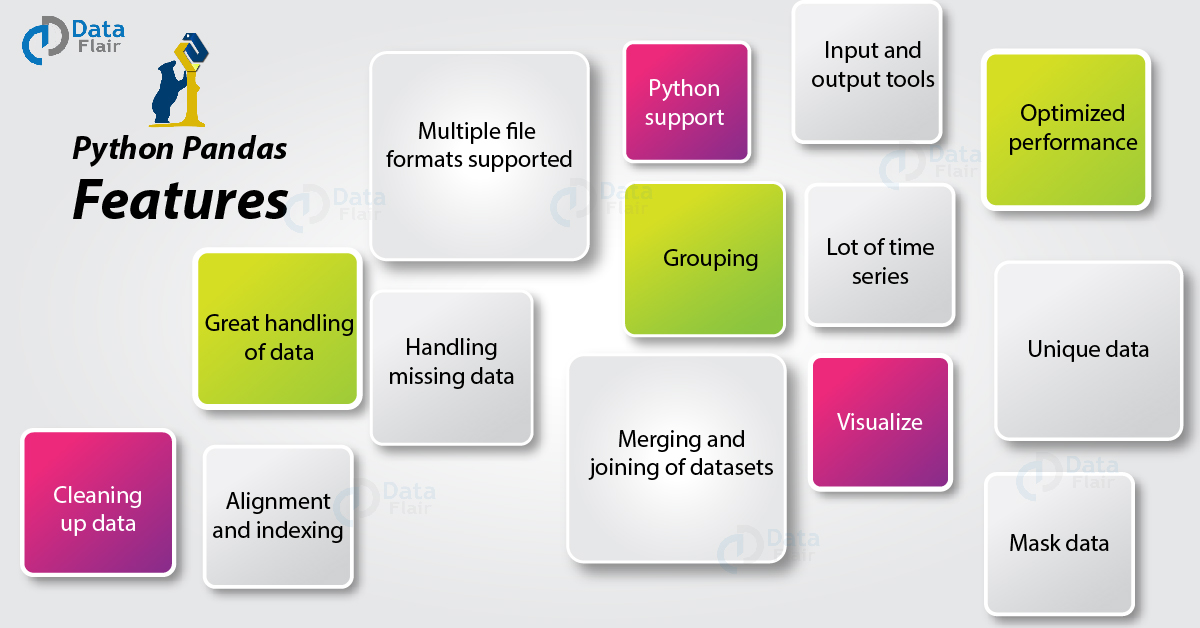


- Calculate statistics and answer questions about the data, like

    - What's the average, median, max, or min of each column? 
    - Does column A correlate with column B?
    - What does the distribution of data in column C look like?

- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria


- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more. 


- Store the cleaned, transformed data back into a CSV, other file or database


Before we jump into the modeling or the complex visualizations we need to have a good understanding of the nature of datasets using pandas as our key package.


## Core components of pandas: Series and DataFrames

The primary two components of pandas are the `Series` and `DataFrame`. 

A `Series` is essentially a column, and a `DataFrame` is a multi-dimensional table made up of a collection of Series. 

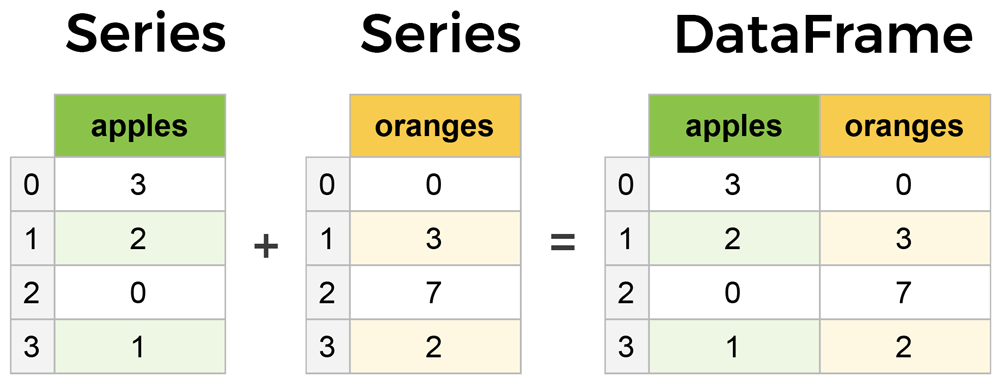

DataFrames and Series are quite similar in that many operations that you can do with one you can do with the other, such as filling in null values and calculating the mean.

You'll see how these components work when we start working with data below. 

In [2]:
import pandas as pd
import numpy as np

## Tidy Data - A foundation for wrangling with pandas
In a tidy data set each variable is saved in its own column and each observation is saved in a row.

![Tidy data](images/tidy_data.png)

## Creating data frames
Our aim is to create a data frame with 3 __columns__ and 3 __rows__

![Dataframe1](images/df_1.png)

Below is the syntax to create the above data frame columnwise.

In [3]:
df = pd.DataFrame({"a":[4,5,6],
                 "b":[7,8,9],
                 "c": [10,11,12]},
                 index=[1,2,3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


## Exercise 3.1
Find the follwing for the variables a, b and c
+ Mean for a hint you can use df.mean() this will give all the means
+ Median for b you can use df.median() this will give all the means
+ Cusum for c you can use df.cumsum() this will give all the means

In [6]:
df.mean()

a     5.0
b     8.0
c    11.0
dtype: float64

In [10]:
df["a"].mean()

5.0

In [11]:
df.median()
df["b"].median()

8.0

In [12]:
df.cumsum()
df["c"].cumsum()

1    10
2    21
3    33
Name: c, dtype: int64

## How can I get help??
We can use the help function or the question mark at the end of the function

In [ ]:
#help(pd.DataFrame)

In [15]:
import statistics
statistics.mean?

Below is the syntax to create the above data frame rowwise.

In [5]:
df = pd.DataFrame(
    [[4, 7, 10],
    [5, 8, 11],
    [6, 9, 12]],
    index=[1, 2, 3],
    columns=['a', 'b', 'c'])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


## Create DataFrame with a MultiIndex
A multi index is a file with mutiple row identifiers

![MultiIndex](images/df_2.png)

In [7]:
df_multi = pd.DataFrame(
    {"a" : [4 ,5, 6],
     "b" : [7, 8, 9], 
     "c" : [10, 11, 12]}, 
    index = pd.MultiIndex.from_tuples(
        [('d',1),('d',2),('e',2)],
        names=['n','v']))
df_multi

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

## Reshaping Data – Change the layout of a data set
This involves changing the data layout either from a wide or long format. To gather columns into rows (long format) and spread rows into columns _pd.melt_ and _df.pivot_ is used respectively. 

![Reshaping of DataFrames](images/df_melt_pivot.png)

In [16]:
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [27]:
#Gather columns into rows using the  df Dataframe we created
df_long = pd.melt(df)
df_long

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


In [29]:
df1 = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                    'B': {0: 1, 1: 3, 2: 5},
                    'C': {0: 2, 1: 4, 2: 6}})
df1

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [31]:
pd.melt(df1, id_vars=['A'], value_vars=['B', "C"])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


## Exercise 3.2
Given the following data on four patients CD4s for 3 visits at a local health facility.
+ **Simon**: 78, 98, 157, 570
+ **Charity**: 567, 324, 679, 721
+ **Mary**: 100, 320, 256, 432
+ **Joel**: 900, 856, 567, 432

+ a) Make a dataframe called **dfcd4_wide** in wide format with the variables name (index), CD4_visit1, ....,CD4_visit4

+ b) Make another dataframe called **dfcd4_long**

+ c) Repeat a) and b) using another slightly different approach 

+ d) Use the help(pd.pivot) to assist you on how to change data from long back to wide format and do it for this example above

In [120]:
dfcd4_wide = pd.DataFrame({"CD4_visit1":[78,567,100,900],
                 "CD4_visit2":[98,324, 320, 856],
                 "CD4_visit3": [157, 679, 256, 567],
                "CD4_visit4":[570, 721, 432, 432]},
                 index=["Simon", "Charity", "Mary", "Joel"])
dfcd4_wide

,CD4_visit1,CD4_visit2,CD4_visit3,CD4_visit4
Simon,78,98,157,570
Charity,567,324,679,721
Mary,100,320,256,432
Joel,900,856,567,432


In [121]:
dfcd4_w2 = pd.DataFrame({'name': {0: 'Simon', 1: 'Charity', 2: 'Mary', 3:'Joel'},
                    "CD4_visit1":{0: 78,1: 567,2: 100,3: 900},
                 "CD4_visit2":{0: 98,1: 324, 2: 320, 3: 856},
                 "CD4_visit3": {0: 157,1: 679, 2: 256, 3: 567},
                "CD4_visit4":{0: 570, 1: 721, 2: 432, 3: 432}})
dfcd4_w2

,name,CD4_visit1,CD4_visit2,CD4_visit3,CD4_visit4
0,Simon,78,98,157,570
1,Charity,567,324,679,721
2,Mary,100,320,256,432
3,Joel,900,856,567,432


In [122]:
dfcd4_long=pd.melt(dfcd4_w2, id_vars="name", var_name="visit", value_name="CD4_count")
dfcd4_long

,name,visit,CD4_count
0,Simon,CD4_visit1,78
1,Charity,CD4_visit1,567
2,Mary,CD4_visit1,100
3,Joel,CD4_visit1,900
4,Simon,CD4_visit2,98
5,Charity,CD4_visit2,324
6,Mary,CD4_visit2,320
7,Joel,CD4_visit2,856
8,Simon,CD4_visit3,157
9,Charity,CD4_visit3,679


In [123]:
df_wide_cd4=dfcd4_long.pivot(index="name", columns="visit", values="CD4_count")
df_wide_cd4

visit,CD4_visit1,CD4_visit2,CD4_visit3,CD4_visit4
name,,,,
Charity,567,324,679,721
Joel,900,856,567,432
Mary,100,320,256,432
Simon,78,98,157,570


# Day 4: Python training CESAR

## Handling dates in pandas

We can work with dates in python using the pandas functions mainly **to_datetime** and **Timestamp** below is the help function output for to_datetime in module pandas.core.tools.datetimes:

+ to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix', cache=True)

This function Converts argument to datetime.

    arg : int, float, str, datetime, list, tuple, 1-d array, Series DataFrame/dict-like
    
    unit : str, default 'ns'
        The unit of the arg (D,s,ms,us,ns) denote the unit, which is an
        integer or float number. This will be based off the origin.
        Example, with unit='ms' and origin='unix' (the default), this
        would calculate the number of milliseconds to the unix epoch start.
 
 Assembling a datetime from multiple columns of a DataFrame. The keys can be
    common abbreviations like ['year', 'month', 'day', 'minute', 'second',
    'ms', 'us', 'ns']) or plurals of the same

In [204]:
import pandas as pd
import numpy as np

In [205]:
#Let's start with calculating your age today , modify this example
(pd.to_datetime('today').year-pd.to_datetime('1983-11-05').year)

64

In [200]:
df = pd.DataFrame({'year': [2015, 2016],
                       'month': [2, 3],
                       'day': [4, 5]})
df
df["dob"]=pd.to_datetime(df, unit="Y")
df

,year,month,day,dob
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


In [203]:
#df = pd.DataFrame({'year': [2015, 2016],
                      # 'month': [2, 3],
                      # 'day': [4, 5]})
#dob=pd.to_datetime(df, unit="Y")
#pd.to_datetime([1, 2, 3], unit='D',
#now = pd.Timestamp('now')
#age=(now-dob)
#age
#age1=(now-dob)/365.25
#age1

df['age2'] = (now - df['dob']).astype('<m8[Y]')    # 3
df
#age2=(now-dob).astype("<m8[Y]")
#age2

df['dob'] = pd.to_datetime(df['dob'], format='%m%d%y')    # 1

#Using a unix epoch time
49*365.25*24*60*60
pd.to_datetime(1490195805, unit='s')
#pd.to_datetime(1490195805433502912, unit='ns')

#pd.to_datetime([1, 2, 3], unit='D',origin=pd.Timestamp('1960-01-01'))

Timestamp('2017-03-22 15:16:45')

## Guided Tutorial on data manipulations 4.1

Given the following data on four patients CD4s for 3 visits at a local health facility.

+ **Simon**: 78, 98, 157, 570
+ **Charity**: 567, 324, 679, 721
+ **Mary**: 100, 320, 256, 432
+ **Joel**: 900, 856, 567, 432

Using our dataframes **dfcd4_wide** and **dfcd4_long** answer the following

+ a) Perform a few descriptive statistics on these data in wide format also in long format (hint use groupby(by="name")
+ b) Order the data (dscd4_long) in ascending and descending order
+ c) Locate some variables and data values of interest on your dataset
+ d) Save the data as an .csv and export, then import the files
+ e) Given the foloowing dates of birth for the participants, include these on the data frame and calculate their ages today

In [124]:
#help(pd.melt)
#Summary statistics for variables using visit (axis=0)
df_wide_cd4.mean(axis=0)
df_wide_cd4.min(axis=0)
df_wide_cd4.max(axis=0)
df_wide_cd4.median(axis=0)
df_wide_cd4.sum(axis=0)

visit
CD4_visit1    1645
CD4_visit2    1598
CD4_visit3    1659
CD4_visit4    2155
dtype: int64

In [125]:
#Summary statistics for variables using name (axis=1)
df_wide_cd4.mean(axis=1)
df_wide_cd4.min(axis=1)
df_wide_cd4.max(axis=1)
df_wide_cd4.median(axis=1)
df_wide_cd4.sum(axis=1)

name
Charity    2291
Joel       2755
Mary       1108
Simon       903
dtype: int64

In [126]:
### Recoding variables: String to text for binary and 
#df['col1'] = np.where(df['col1'] == "Yes", 1, 0)

### Ordering/Sorting DataFrame
This involves ordering rows by values of a column (low to high or high to low).

In [128]:
#Order rows by values of a column (low to high).
dfcd4_long.sort_values('CD4_count')

,name,visit,CD4_count
0,Simon,CD4_visit1,78
4,Simon,CD4_visit2,98
2,Mary,CD4_visit1,100
8,Simon,CD4_visit3,157
10,Mary,CD4_visit3,256
6,Mary,CD4_visit2,320
5,Charity,CD4_visit2,324
14,Mary,CD4_visit4,432
15,Joel,CD4_visit4,432
1,Charity,CD4_visit1,567


In [130]:
#Order rows by values of a column (high to low).
dfcd4_long.sort_values('CD4_count',ascending=False) 

,name,visit,CD4_count
3,Joel,CD4_visit1,900
7,Joel,CD4_visit2,856
13,Charity,CD4_visit4,721
9,Charity,CD4_visit3,679
12,Simon,CD4_visit4,570
1,Charity,CD4_visit1,567
11,Joel,CD4_visit3,567
14,Mary,CD4_visit4,432
15,Joel,CD4_visit4,432
5,Charity,CD4_visit2,324


### Rename the columns of a DataFrame
Here we rename the column _variable_ to _var_ in our _'df_wide'_ DataFrame

In [131]:
dfcd4_long.rename(columns = {'CD4_count':'cd4_count'})

,name,visit,cd4_count
0,Simon,CD4_visit1,78
1,Charity,CD4_visit1,567
2,Mary,CD4_visit1,100
3,Joel,CD4_visit1,900
4,Simon,CD4_visit2,98
5,Charity,CD4_visit2,324
6,Mary,CD4_visit2,320
7,Joel,CD4_visit2,856
8,Simon,CD4_visit3,157
9,Charity,CD4_visit3,679


### Sort the index of a DataFrame

In [135]:
dfcd4_long.sort_index() # Sort the data based on the index numbers of that data
dfcd4_long.sort_values("name") # You can specify which variable you want to sort default is ascending order
dfcd4_long.sort_values("name", ascending =False) #Doing it via the descending order

,name,visit,CD4_count
0,Simon,CD4_visit1,78
4,Simon,CD4_visit2,98
8,Simon,CD4_visit3,157
12,Simon,CD4_visit4,570
2,Mary,CD4_visit1,100
6,Mary,CD4_visit2,320
10,Mary,CD4_visit3,256
14,Mary,CD4_visit4,432
3,Joel,CD4_visit1,900
7,Joel,CD4_visit2,856


### Moving index to columns
Reset index of DataFrame to row numbers, moving index to columns.

In [139]:
dfcd4_long2=dfcd4_long.reset_index()

### Deleting or dropping columns from a DataFrame
Here we drop the variable _value_ from our _'dfcd4_long'_ DataFrame.

In [143]:
dfcd4_long2.drop(columns=['index'])
#dfcd4_long2.rename(columns = {'CD4_count':'cd4_count'})

,name,visit,CD4_count
0,Simon,CD4_visit1,78
1,Charity,CD4_visit1,567
2,Mary,CD4_visit1,100
3,Joel,CD4_visit1,900
4,Simon,CD4_visit2,98
5,Charity,CD4_visit2,324
6,Mary,CD4_visit2,320
7,Joel,CD4_visit2,856
8,Simon,CD4_visit3,157
9,Charity,CD4_visit3,679


## Subset Observations
### Subseting Rows
This involves selecting part of the observations in a DataFrame. This can be done either rowwise or columnwise

![Subset DataFrames](images/df_subset.png)

For example to select only rows that have a _value_ greater than 9 from our _'df_wide'_ DataFrame

In [144]:
## select only rows that have a CD4_count greater than 350
dfcd4_long2[dfcd4_long2.CD4_count > 350]

,index,name,visit,CD4_count
1,1,Charity,CD4_visit1,567
3,3,Joel,CD4_visit1,900
7,7,Joel,CD4_visit2,856
9,9,Charity,CD4_visit3,679
11,11,Joel,CD4_visit3,567
12,12,Simon,CD4_visit4,570
13,13,Charity,CD4_visit4,721
14,14,Mary,CD4_visit4,432
15,15,Joel,CD4_visit4,432


From the above command we use the _>_  Logic in Python (and pandas). Below are some of the most common Logic in Python

![Subset DataFrames](images/df_logic.png)

In [149]:
## Select first n rows.
## Here we select the first 3 rows from the df_wide dataset
dfcd4_wide.head(3)

,CD4_visit1,CD4_visit2,CD4_visit3,CD4_visit4
Simon,78,98,157,570
Charity,567,324,679,721
Mary,100,320,256,432


In [148]:
## Select last n rows.
## Here we select the last 3 rows from the df_wide dataset
dfcd4_wide.tail(3)

,CD4_visit1,CD4_visit2,CD4_visit3,CD4_visit4
Charity,567,324,679,721
Mary,100,320,256,432
Joel,900,856,567,432


In [153]:
## Select rows by position.
## Here we indicate position 2 to 4 to select row 2 to 3 
## note 4 is excliuded
dfcd4_wide.iloc[2]

CD4_visit1    100
CD4_visit2    320
CD4_visit3    256
CD4_visit4    432
Name: Mary, dtype: int64

In [162]:
##Select and order top n entries.
## here we select the 3 largest _value_ and order them ascending
dfcd4_long.nlargest(3, 'CD4_count')

,name,visit,CD4_count
3,Joel,CD4_visit1,900
7,Joel,CD4_visit2,856
13,Charity,CD4_visit4,721


In [164]:
#Select and order bottom n entries.
## here we select the 3 smallest _value_ and order them ascending
dfcd4_long.nsmallest(3, 'CD4_count')

,name,visit,CD4_count
0,Simon,CD4_visit1,78
4,Simon,CD4_visit2,98
2,Mary,CD4_visit1,100


In [23]:
#help(df_wide.nsmallest)

#### Randomly subsetting the DataFrame rows

In [165]:
#Randomly select fraction of rows. 
dfcd4_long.sample(frac=0.5)

,name,visit,CD4_count
5,Charity,CD4_visit2,324
13,Charity,CD4_visit4,721
14,Mary,CD4_visit4,432
7,Joel,CD4_visit2,856
9,Charity,CD4_visit3,679
1,Charity,CD4_visit1,567
15,Joel,CD4_visit4,432
10,Mary,CD4_visit3,256


In [166]:
#Randomly select 3 rows.
dfcd4_long.sample(n=3)

,name,visit,CD4_count
13,Charity,CD4_visit4,721
15,Joel,CD4_visit4,432
0,Simon,CD4_visit1,78


### Subseting Columns
Select multiple columns with specific names or columns that meet a certain criteria using Regex - https://www.w3schools.com/python/python_regex.asp

![Regex](images/df_regex.png)

In [167]:
## Selecting two variables 
dfcd4_long[['name','visit']]

,name,visit
0,Simon,CD4_visit1
1,Charity,CD4_visit1
2,Mary,CD4_visit1
3,Joel,CD4_visit1
4,Simon,CD4_visit2
5,Charity,CD4_visit2
6,Mary,CD4_visit2
7,Joel,CD4_visit2
8,Simon,CD4_visit3
9,Charity,CD4_visit3


In [169]:
## selecting  a single variable/column with a specific name
dfcd4_long['CD4_count']  
#dfcd4_long.CD4_count  

0      78
1     567
2     100
3     900
4      98
5     324
6     320
7     856
8     157
9     679
10    256
11    567
12    570
13    721
14    432
15    432
Name: CD4_count, dtype: int64

In [177]:
#Select columns whose name matches regular expression regex.
dfcd4_wide.filter(regex="n")
#Now try pulling out only those variables with the CD4 values
#dfcd4_wide.filter(regex="CD4")
dfcd4_wide.filter(regex="visit")

,CD4_visit1,CD4_visit2,CD4_visit3,CD4_visit4
Simon,78,98,157,570
Charity,567,324,679,721
Mary,100,320,256,432
Joel,900,856,567,432


In [178]:
#Select all columns between a and b (inclusive)
dfcd4_wide.loc[:,'CD4_visit1':'CD4_visit3']


,CD4_visit1,CD4_visit2,CD4_visit3
Simon,78,98,157
Charity,567,324,679
Mary,100,320,256
Joel,900,856,567


In [179]:
#Select columns in positions 1 and 3 (first column is 0).
dfcd4_wide.iloc[:,[0,2]]

,CD4_visit1,CD4_visit3
Simon,78,157
Charity,567,679
Mary,100,256
Joel,900,567


In [181]:
#Select rows meeting logical condition, and only the specific columns .
dfcd4_long.loc[dfcd4_long['CD4_count'] > 500, ['name','CD4_count']]

,name,CD4_count
1,Charity,567
3,Joel,900
7,Joel,856
9,Charity,679
11,Joel,567
12,Simon,570
13,Charity,721


In [182]:
## saving the DataFrame to CSV
dfcd4_wide.to_csv('df_wide.csv',index=True)
dfcd4_long.to_csv('df_long.csv',index=True)

In [188]:
df_wide=pd.read_csv('df_wide.csv')
df_wide

In [ ]:
#Try out for excel
dfcd4_wide.to_excel('df_widex.xlsm',index=True)
dfcd4_long.to_excel('df_longx.xlsm',index=True)

## Solved Excercise 
Create and save two DataFrame's with 10 (id=1,2,3,4,5,6,7,8,9,10) individuals, __'df_personal'__ with  _'id, weight,gender,age,province,income,insurance'_ and the __'df_medical'__ DataFrame with _'id,sbp,dbp, saltadd'_

In [32]:
df_personal =  pd.DataFrame({"id":[1,2,3,4,5,6,7,8,9,10],
                 "age":[65,50,55,45,25,45,35,70,20,30],
                 "gender": ['male', 'female', 'male', 'female', 'female', 'male', 'female', 'male', 'male', 'female'],
                  "weight":[80,65,60,80,95,86,97,58,59,110],
                "province":['FS','GP','KZN','LP','MP','NC','NW','WC','GP','FS'],
                "income":[65000,50000,55000,45000,25000,45000,35000,70000,20000,30000],
                "insurance":[1,0,1,0,1,0,0,1,1,1]})

df_personal.set_index('id')

,age,gender,weight,province,income,insurance
id,,,,,,
1,65,male,80,FS,65000,1
2,50,female,65,GP,50000,0
3,55,male,60,KZN,55000,1
4,45,female,80,LP,45000,0
5,25,female,95,MP,25000,1
6,45,male,86,NC,45000,0
7,35,female,97,NW,35000,0
8,70,male,58,WC,70000,1
9,20,male,59,GP,20000,1


In [33]:
df_medical =  pd.DataFrame({"id":[1,2,3,4,5,6,7,8,9,10,11],
                 "sbp":[110, 85, 167, None, 180, 112, 110,None , 171, 133,None],
                 "dbp": [80, 55, 112, None, 120, 78, 70, None, 102, 75,88],
                  "saltadd":['yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes','no']})

df_medical.set_index('id')

,sbp,dbp,saltadd
id,,,
1,110.0,80.0,yes
2,85.0,55.0,no
3,167.0,112.0,yes
4,NaN,NaN,yes
5,180.0,120.0,no
6,112.0,78.0,no
7,110.0,70.0,no
8,NaN,NaN,yes
9,171.0,102.0,yes


In [34]:
## saving the DataFrame to CSV
df_medical.to_csv('df_medical.csv',index=True)
df_personal.to_csv('df_personal.csv',index=True)

__How can you read the CSV files?__

## Handling Missing Data
_dropna_ function drop rows with any column having NA/null data and _fillna()_ replaces all NA/null data with value.

In [35]:
df_medical.dropna()

,id,sbp,dbp,saltadd
0,1,110.0,80.0,yes
1,2,85.0,55.0,no
2,3,167.0,112.0,yes
4,5,180.0,120.0,no
5,6,112.0,78.0,no
6,7,110.0,70.0,no
8,9,171.0,102.0,yes
9,10,133.0,75.0,yes


In [36]:
#replaces all NA/null data with value -> here we replace the sbp and dbp zero for exercise case only
df_medical.fillna(0)

,id,sbp,dbp,saltadd
0,1,110.0,80.0,yes
1,2,85.0,55.0,no
2,3,167.0,112.0,yes
3,4,0.0,0.0,yes
4,5,180.0,120.0,no
5,6,112.0,78.0,no
6,7,110.0,70.0,no
7,8,0.0,0.0,yes
8,9,171.0,102.0,yes
9,10,133.0,75.0,yes


In [37]:
## replacing specific columns with sepcific values 
#here we replace the sbp and dbp with the average of 120/80 respectively
df_medical.fillna(value={'sbp': 120, 'dbp': 80})

,id,sbp,dbp,saltadd
0,1,110.0,80.0,yes
1,2,85.0,55.0,no
2,3,167.0,112.0,yes
3,4,120.0,80.0,yes
4,5,180.0,120.0,no
5,6,112.0,78.0,no
6,7,110.0,70.0,no
7,8,120.0,80.0,yes
8,9,171.0,102.0,yes
9,10,133.0,75.0,yes


## Make New Columns
This is adding new columns to the data. We compute and add a column _'sd_bp_ratio'_ which is $sdp/dbp$

![Adding new column](images/df_new_column.png)

In [38]:
##Compute and append one or more new columns.
df_medical.assign(sd_bp_ratio=lambda df_medical: df_medical.sbp/df_medical.dbp)

,id,sbp,dbp,saltadd,sd_bp_ratio
0,1,110.0,80.0,yes,1.375000
1,2,85.0,55.0,no,1.545455
2,3,167.0,112.0,yes,1.491071
3,4,NaN,NaN,yes,NaN
4,5,180.0,120.0,no,1.500000
5,6,112.0,78.0,no,1.435897
6,7,110.0,70.0,no,1.571429
7,8,NaN,NaN,yes,NaN
8,9,171.0,102.0,yes,1.676471
9,10,133.0,75.0,yes,1.773333


In [39]:
#Add single column.
df_medical['sd_bp_ratio'] = df_medical.sbp/df_medical.dbp
df_medical

,id,sbp,dbp,saltadd,sd_bp_ratio
0,1,110.0,80.0,yes,1.375000
1,2,85.0,55.0,no,1.545455
2,3,167.0,112.0,yes,1.491071
3,4,NaN,NaN,yes,NaN
4,5,180.0,120.0,no,1.500000
5,6,112.0,78.0,no,1.435897
6,7,110.0,70.0,no,1.571429
7,8,NaN,NaN,yes,NaN
8,9,171.0,102.0,yes,1.676471
9,10,133.0,75.0,yes,1.773333


## Combine/Merge Data Sets
This involves joining mutiple DataFrames into a single DataFrame. In this example, we are going to merge the personal and the medical data.
![Merge](images/df_merge.png)

### Join matching rows from _'df_personal'_ to _'df_medical'_ .
You specify the two DataFrames to be joined and also __IMPORTANTLY__ specify the _on_ column. This is the column (sometimes should have the same name ) that uniquely identifies the rows in both DataFrames

In [40]:
## overview personal DF
print(df_personal.head(5))

   id  age  gender  weight province  income  insurance
0   1   65    male      80       FS   65000          1
1   2   50  female      65       GP   50000          0
2   3   55    male      60      KZN   55000          1
3   4   45  female      80       LP   45000          0
4   5   25  female      95       MP   25000          1


In [41]:
### overview medical DF
print(df_medical.head(11))

    id    sbp    dbp saltadd  sd_bp_ratio
0    1  110.0   80.0     yes     1.375000
1    2   85.0   55.0      no     1.545455
2    3  167.0  112.0     yes     1.491071
3    4    NaN    NaN     yes          NaN
4    5  180.0  120.0      no     1.500000
5    6  112.0   78.0      no     1.435897
6    7  110.0   70.0      no     1.571429
7    8    NaN    NaN     yes          NaN
8    9  171.0  102.0     yes     1.676471
9   10  133.0   75.0     yes     1.773333
10  11    NaN   88.0      no          NaN


This merges all the data on the left DataFrame to the right data frame. 

![Left join src:sqltutorial](images/left_join.png)

In [42]:
pd.merge(df_personal, df_medical,how='left', on='id')

,id,age,gender,weight,province,income,insurance,sbp,dbp,saltadd,sd_bp_ratio
0,1,65,male,80,FS,65000,1,110.0,80.0,yes,1.375000
1,2,50,female,65,GP,50000,0,85.0,55.0,no,1.545455
2,3,55,male,60,KZN,55000,1,167.0,112.0,yes,1.491071
3,4,45,female,80,LP,45000,0,NaN,NaN,yes,NaN
4,5,25,female,95,MP,25000,1,180.0,120.0,no,1.500000
5,6,45,male,86,NC,45000,0,112.0,78.0,no,1.435897
6,7,35,female,97,NW,35000,0,110.0,70.0,no,1.571429
7,8,70,male,58,WC,70000,1,NaN,NaN,yes,NaN
8,9,20,male,59,GP,20000,1,171.0,102.0,yes,1.676471
9,10,30,female,110,FS,30000,1,133.0,75.0,yes,1.773333


### Join matching rows from rows from  _'df_medical'_  to _'df_personal'_
Notice that _id_ 11 will be available on the merge below

In [43]:
pd.merge(df_personal, df_medical,how='right', on='id')

,id,age,gender,weight,province,income,insurance,sbp,dbp,saltadd,sd_bp_ratio
0,1,65.0,male,80.0,FS,65000.0,1.0,110.0,80.0,yes,1.375000
1,2,50.0,female,65.0,GP,50000.0,0.0,85.0,55.0,no,1.545455
2,3,55.0,male,60.0,KZN,55000.0,1.0,167.0,112.0,yes,1.491071
3,4,45.0,female,80.0,LP,45000.0,0.0,NaN,NaN,yes,NaN
4,5,25.0,female,95.0,MP,25000.0,1.0,180.0,120.0,no,1.500000
5,6,45.0,male,86.0,NC,45000.0,0.0,112.0,78.0,no,1.435897
6,7,35.0,female,97.0,NW,35000.0,0.0,110.0,70.0,no,1.571429
7,8,70.0,male,58.0,WC,70000.0,1.0,NaN,NaN,yes,NaN
8,9,20.0,male,59.0,GP,20000.0,1.0,171.0,102.0,yes,1.676471
9,10,30.0,female,110.0,FS,30000.0,1.0,133.0,75.0,yes,1.773333


### Join data. Retain only rows in both sets.

![Inner join src:sqltutorial.org](images/inner_join.png)

In [44]:
pd.merge(df_personal, df_medical,how='inner', on='id')

,id,age,gender,weight,province,income,insurance,sbp,dbp,saltadd,sd_bp_ratio
0,1,65,male,80,FS,65000,1,110.0,80.0,yes,1.375000
1,2,50,female,65,GP,50000,0,85.0,55.0,no,1.545455
2,3,55,male,60,KZN,55000,1,167.0,112.0,yes,1.491071
3,4,45,female,80,LP,45000,0,NaN,NaN,yes,NaN
4,5,25,female,95,MP,25000,1,180.0,120.0,no,1.500000
5,6,45,male,86,NC,45000,0,112.0,78.0,no,1.435897
6,7,35,female,97,NW,35000,0,110.0,70.0,no,1.571429
7,8,70,male,58,WC,70000,1,NaN,NaN,yes,NaN
8,9,20,male,59,GP,20000,1,171.0,102.0,yes,1.676471
9,10,30,female,110,FS,30000,1,133.0,75.0,yes,1.773333


### Join data. Retain all values, all rows.
![Full join src:sqltutorial.org](images/full_join.png)

In [45]:
pd.merge(df_personal, df_medical,how='outer', on='id')

,id,age,gender,weight,province,income,insurance,sbp,dbp,saltadd,sd_bp_ratio
0,1,65.0,male,80.0,FS,65000.0,1.0,110.0,80.0,yes,1.375000
1,2,50.0,female,65.0,GP,50000.0,0.0,85.0,55.0,no,1.545455
2,3,55.0,male,60.0,KZN,55000.0,1.0,167.0,112.0,yes,1.491071
3,4,45.0,female,80.0,LP,45000.0,0.0,NaN,NaN,yes,NaN
4,5,25.0,female,95.0,MP,25000.0,1.0,180.0,120.0,no,1.500000
5,6,45.0,male,86.0,NC,45000.0,0.0,112.0,78.0,no,1.435897
6,7,35.0,female,97.0,NW,35000.0,0.0,110.0,70.0,no,1.571429
7,8,70.0,male,58.0,WC,70000.0,1.0,NaN,NaN,yes,NaN
8,9,20.0,male,59.0,GP,20000.0,1.0,171.0,102.0,yes,1.676471
9,10,30.0,female,110.0,FS,30000.0,1.0,133.0,75.0,yes,1.773333


### Filtering Joins
All rows in _'df_personal'_ that have a matching _id_ in '_df_medical'_. Only display _'df_personal'_ with medical data

In [46]:
df_personal[df_personal.id.isin(df_medical.id)]

,id,age,gender,weight,province,income,insurance
0,1,65,male,80,FS,65000,1
1,2,50,female,65,GP,50000,0
2,3,55,male,60,KZN,55000,1
3,4,45,female,80,LP,45000,0
4,5,25,female,95,MP,25000,1
5,6,45,male,86,NC,45000,0
6,7,35,female,97,NW,35000,0
7,8,70,male,58,WC,70000,1
8,9,20,male,59,GP,20000,1
9,10,30,female,110,FS,30000,1


Here we try to see if there is any individual (_id_) with personal data but miss in medical data. We get a NULL DataFrame since all the individuals (_id_) have medical data available

In [47]:
df_personal[~df_personal.id.isin(df_medical.id)]

,id,age,gender,weight,province,income,insurance


__Excercise: Try filtering the individuals with medical data but have missing personal data__
